# Functional Level Comparision

This notebook computes the opus and weighted opus score for the following:
1. Electric Hook Type TD
    * vs. all types of Electric Hand
    * vs. Electric single grip hand
    * vs. body-powered TD
    * vs. Electric multi-articulating hand
2. Motion Control ETD
    * vs. electric hooks
3. Multi-articulating hands    
    * vs. Electric single grip hand
    * vs. Body-powered TD

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from driverCleanData import cleanData
%matplotlib inline
[sht,_] = cleanData();
newData = pd.read_csv('./newData.csv', names=["Index","Score"])

There are 0 duplicates


## Electric Hook TD
### vs. all types of Electric Hand



In [2]:
sht = sht.loc[newData.index]
sht.Age.describe()

count          476
unique           6
top       35 to 44
freq           186
Name: Age, dtype: object

In [3]:
from vectorSubsets import electricHooks, electricHandMA, electricHandSG
print("Electric hooks are: {0}".format(electricHooks))
print()
print("Electric hands - multi articulating are {0}".format(electricHandMA))
print()
print("Electric hands - single grip are {0}".format(electricHandSG))

Electric hooks are: ['Motion Control (MC) ETD', 'Otto Bock Axon Hook', 'Otto Bock Greifer']

Electric hands - multi articulating are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

Electric hands - single grip are ['Motion Control (MC) Hand', 'Otto Bock Hand']


In [64]:
sht["opusEHo"] = sht.opusScore[sht["PrimaryTerminalDevice"].isin(electricHooks)]
sht["opusAllEHa"] = sht.opusScore[sht["PrimaryTerminalDevice"].isin(electricHandMA and electricHandSG)].dropna()

#### Summary Stats

First up the electric hooks

In [65]:
sht.opusEHo.dropna().describe()

count    42.000000
mean     59.857143
std       9.335407
min      33.000000
25%      54.250000
50%      58.000000
75%      67.000000
max      78.000000
Name: opusEHo, dtype: float64

Now for the electric hands

In [66]:
sht.opusAllEHa.dropna().describe()

count    205.000000
mean      60.400000
std        8.661726
min       33.000000
25%       53.000000
50%       59.000000
75%       68.000000
max       78.000000
Name: opusAllEHa, dtype: float64


#### Histogram


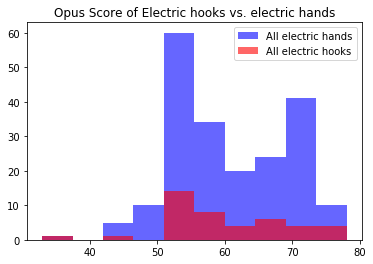

In [67]:
plt.hist(sht.opusAllEHa.dropna(), alpha=0.6, color='b', label = "All electric hands")
plt.hist(sht.opusEHo.dropna(), alpha=0.6, color='r', label = "All electric hooks")
plt.title("Opus Score of Electric hooks vs. electric hands")
plt.legend()
plt.show()

Looks like we might have some significance, however the limited sample of electric hooks will limit our conclusions.

In [8]:
stats.ttest_ind(sht.opusAllEHa.dropna(), sht.opusEHo.dropna())

Ttest_indResult(statistic=0.052357475980177468, pvalue=0.95830796726417389)

The higher mean score on Opus of electric hooks compared to electric hands is significant.

### Weighted Opus

In [9]:
sht["opusEHoWeighted"] = sht.weightedOpusScore[sht["PrimaryTerminalDevice"].isin(electricHooks)]
sht["opusAllEHaWeighted"] = sht.weightedOpusScore[sht["PrimaryTerminalDevice"].isin(electricHandMA or electricHandSG)].dropna()

#### Histogram

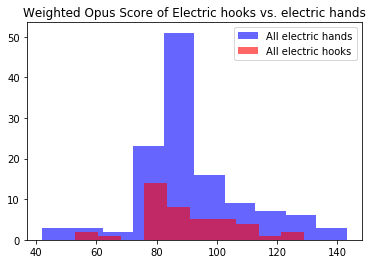

In [10]:
plt.hist(sht.opusAllEHaWeighted.dropna(), alpha=0.6, color='b', label = "All electric hands")
plt.hist(sht.opusEHoWeighted.dropna(), alpha=0.6, color='r', label = "All electric hooks")
plt.title("Weighted Opus Score of Electric hooks vs. electric hands")
plt.legend()
plt.show()

Looks good, let's take a look at summary stats

In [11]:
print(sht.opusAllEHaWeighted.dropna().describe())
print()
print(sht.opusEHoWeighted.dropna().describe())

count    123.000000
mean      91.422764
std       17.745010
min       42.000000
25%       82.500000
50%       89.000000
75%       97.000000
max      143.000000
Name: opusAllEHaWeighted, dtype: float64

count     42.00000
mean      90.00000
std       15.90674
min       53.00000
25%       81.00000
50%       85.50000
75%      100.50000
max      129.00000
Name: opusEHoWeighted, dtype: float64


In [12]:
stats.ttest_ind(sht.opusAllEHaWeighted.dropna(), sht.opusEHoWeighted.dropna())

Ttest_indResult(statistic=0.46014688548078536, pvalue=0.64602401581183644)

We don't have significance at the 0.05 level

## vs. Electric single grip hand

In [13]:
sht["opusElecSG"] = sht.opusScore[sht["PrimaryTerminalDevice"].isin(electricHandSG)]
print("The types of devices we are considering as electric hands are {0}".format(electricHandSG))
print()
print("The mean of the electric hooks opus is {0}".format(sht.opusEHo.dropna().mean()))
print()
print("The summary stats for the single grip are")
print(sht.opusElecSG.dropna().describe())

# create weighted for later use
sht["opusElecSGWeighted"] = sht.weightedOpusScore[sht["PrimaryTerminalDevice"].isin(electricHandSG)]

The types of devices we are considering as electric hands are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The mean of the electric hooks opus is 59.857142857142854

The summary stats for the single grip are
count    205.000000
mean      60.400000
std        8.661726
min       33.000000
25%       53.000000
50%       59.000000
75%       68.000000
max       78.000000
Name: opusElecSG, dtype: float64


In [14]:
stats.ttest_ind(sht.opusEHo.dropna(), sht.opusElecSG.dropna())

Ttest_indResult(statistic=-0.3651234810449811, pvalue=0.71533423175791877)

The higher mean score for electric hooks compared to single grip is signficant.

#### Histograms


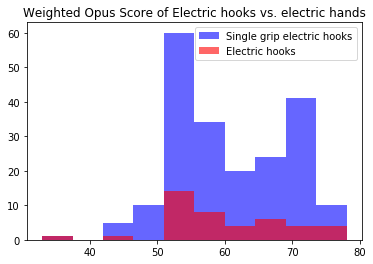

In [15]:
plt.hist(sht.opusElecSG.dropna(), color='b', alpha=0.6, label = "Single grip electric hooks")
plt.hist(sht.opusEHo.dropna(), color='r', alpha=0.6, label = "Electric hooks")
plt.title("Weighted Opus Score of Electric hooks vs. electric hands")
plt.legend()
plt.show()

## vs. Body Powered Hooks

In [16]:
from vectorSubsets import bodyPoweredHooks
sht["opusBPHook"] = sht.opusScore[sht["PrimaryTerminalDevice"].isin(bodyPoweredHooks)]
sht.opusBPHook.dropna().describe()

count    93.000000
mean     60.129032
std       8.740493
min      31.000000
25%      55.000000
50%      59.000000
75%      66.000000
max      77.000000
Name: opusBPHook, dtype: float64

In [17]:
stats.ttest_ind(sht.opusEHo.dropna(), sht.opusBPHook.dropna())

Ttest_indResult(statistic=-0.16380672958166542, pvalue=0.87013195802907772)

Can't reject the null at alpha=0.05

### Weighted Opus

In [18]:
sht["opusBPHookWeighted"] = sht.weightedOpusScore[sht["PrimaryTerminalDevice"].isin(bodyPoweredHooks)]
print("The mean of w.o. for body poweres is {0}".format(sht.opusBPHookWeighted.dropna().mean()))
print("The mean for w.o. for electric hooks is {0}".format(sht.opusEHoWeighted.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusBPHookWeighted.dropna(), sht.opusEHoWeighted.dropna()))

The mean of w.o. for body poweres is 88.82795698924731
The mean for w.o. for electric hooks is 90.0

Ttest_indResult(statistic=-0.3482801658646561, pvalue=0.72818045063653369)


Very simiar to standard opus

## vs. Multi-articulating Hands

In [19]:
from vectorSubsets import electricHandMA
sht["opusMA"] = sht.opusScore[sht["PrimaryTerminalDevice"].isin(electricHandMA)]
print("The summary stats for multi-articulating are:")
print(sht.opusMA.dropna().describe())

The summary stats for multi-articulating are:
count    123.000000
mean      59.943089
std        9.134066
min       28.000000
25%       54.000000
50%       57.000000
75%       66.500000
max       79.000000
Name: opusMA, dtype: float64


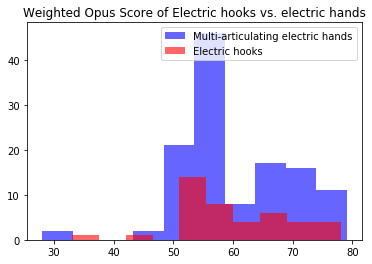

In [20]:
plt.hist(sht.opusMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating electric hands")
plt.hist(sht.opusEHo.dropna(), alpha=0.6, color='r', label = "Electric hooks")
plt.title("Weighted Opus Score of Electric hooks vs. electric hands")
plt.legend()
plt.show()

In [21]:
stats.ttest_ind(sht.opusEHo.dropna(),sht.opusMA.dropna())

Ttest_indResult(statistic=-0.052357475980177468, pvalue=0.95830796726417389)

The higher mean score of the multi-articulating is significant compared to electric hooks.

### Weighted Opus

In [22]:
sht["opusMAWeighted"] = sht.weightedOpusScore[sht["PrimaryTerminalDevice"].isin(electricHandMA)]
print("The average on the w.o. for the electric hooks is {0}".format(sht.opusEHoWeighted.dropna().mean()))
print("The average on the w.o. for the multi-articulating hands is {0}".format(sht.opusMAWeighted.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusMAWeighted.dropna(), sht.opusEHoWeighted.dropna()))

The average on the w.o. for the electric hooks is 90.0
The average on the w.o. for the multi-articulating hands is 91.42276422764228

Ttest_indResult(statistic=0.46014688548078536, pvalue=0.64602401581183644)


Not significant

# Motion Control ETD vs. All Electric Hooks

In [23]:
sht["opusETD"] = sht.opusScore[sht["PrimaryTerminalDevice"]=="Motion Control (MC) ETD"]
from vectorSubsets import electricHooksNoETD
sht["opusElecNoETD"] = sht.opusScore[sht["PrimaryTerminalDevice"].isin(electricHooksNoETD)]
print("The electric hooks we are considering are: {0}".format(electricHooksNoETD))
print("The number of participants are {0}".format(sht.opusElecNoETD.dropna().count()))
print()
print("The average score on opus for the ETD is {0}".format(sht.opusETD.dropna().mean()))
print("The average score on opus for the electric hooks is {0}".format(sht.opusElecNoETD.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusETD.dropna(), sht.opusElecNoETD.dropna()))

The electric hooks we are considering are: ['Otto Bock Greifer', 'Otto Bock Axon Hook']
The number of participants are 10

The average score on opus for the ETD is 58.15625
The average score on opus for the electric hooks is 65.3

Ttest_indResult(statistic=-2.2100307698328723, pvalue=0.032887979313563652)


This result is significant and unfortunately unfavorable for the ETD.  this could change though if the sample for non etd electric hook increased.

Let's look at the histogram

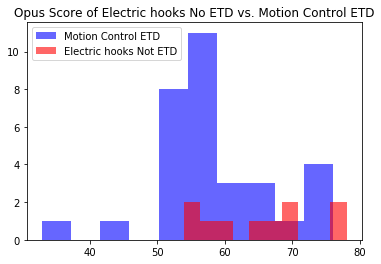

In [24]:
plt.hist(sht.opusETD.dropna(), alpha=0.6, color='b', label = "Motion Control ETD")
plt.hist(sht.opusElecNoETD.dropna(), alpha=0.6, color='r', label = "Electric hooks Not ETD")
plt.title("Opus Score of Electric hooks No ETD vs. Motion Control ETD")
plt.legend()
plt.show()

### Weighted Opus

In [25]:
sht["opusETDWeighted"] = sht.weightedOpusScore[sht["PrimaryTerminalDevice"]=="Motion Control (MC) ETD"]
sht["opusElecNoETDWeighted"] = sht.weightedOpusScore[sht["PrimaryTerminalDevice"].isin(electricHooksNoETD)]
print("The electric hooks we are considering are: {0}".format(electricHooksNoETD))
print("The number of participants are {0}".format(sht.opusElecNoETDWeighted.dropna().count()))
print()
print("The average score on w.o. for the ETD is {0}".format(sht.opusETDWeighted.dropna().mean()))
print("The average score on w.o. for the electric hooks is {0}".format(sht.opusElecNoETDWeighted.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusETDWeighted.dropna(), sht.opusElecNoETDWeighted.dropna()))

The electric hooks we are considering are: ['Otto Bock Greifer', 'Otto Bock Axon Hook']
The number of participants are 10

The average score on w.o. for the ETD is 86.375
The average score on w.o. for the electric hooks is 101.6

Ttest_indResult(statistic=-2.8647652132003101, pvalue=0.0066187534856621318)


Again, we have significance at alpha=0.05, an unfortunate result for the ETD.

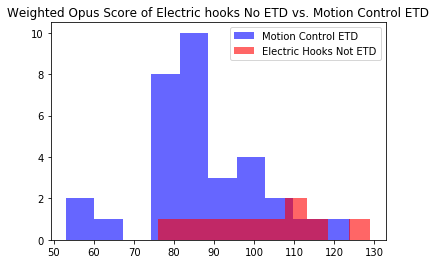

In [26]:
plt.hist(sht.opusETDWeighted.dropna(), alpha=0.6, color='b', label = "Motion Control ETD")
plt.hist(sht.opusElecNoETDWeighted.dropna(), alpha=0.6, color='r', label = "Electric Hooks Not ETD")
plt.title("Weighted Opus Score of Electric hooks No ETD vs. Motion Control ETD")
plt.legend()
plt.show()

## Multi-articulating hands
### vs. Single Grip hands

In [27]:
print("The hands in the multi-articulating group are {0}".format(electricHandMA))
print()
print("The hands in the single grip group are {0}".format(electricHandSG))
print()
print("The average score on opus for the multi-articulating is {0}".format(sht.opusMA.dropna().mean()))
print("The average score on opus for the single grip is {0}".format(sht.opusElecSG.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusMA.dropna(), sht.opusElecSG.dropna()))

The hands in the multi-articulating group are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The hands in the single grip group are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The average score on opus for the multi-articulating is 59.94308943089431
The average score on opus for the single grip is 60.4

Ttest_indResult(statistic=-0.45310667562040841, pvalue=0.65077335423455507)


The higher score on the single grip hands is not significant.

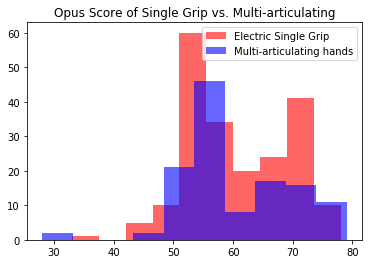

In [28]:
plt.hist(sht.opusElecSG.dropna(), alpha=0.6, color='r', label = "Electric Single Grip")
plt.hist(sht.opusMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating hands")
plt.title("Opus Score of Single Grip vs. Multi-articulating")
plt.legend()
plt.show()

### Weighted Opus

In [29]:
print("The average score on opus for the multi-articulating is {0}".format(sht.opusMAWeighted.dropna().mean()))
print("The average score on opus for the single grip is {0}".format(sht.opusElecSGWeighted.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusMA.dropna(), sht.opusElecSGWeighted.dropna()))

The average score on opus for the multi-articulating is 91.42276422764228
The average score on opus for the single grip is 89.55121951219512

Ttest_indResult(statistic=-19.38256327942964, pvalue=3.2578627199443854e-56)


The high score for single grip is definetly significant!  Interesting the standard opus is not significant, yet the wieghted is.

Let's look at the histogram

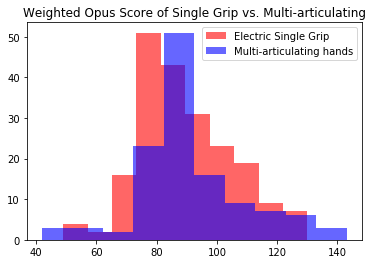

In [30]:
plt.hist(sht.opusElecSGWeighted.dropna(), alpha=0.6, color='r', label = "Electric Single Grip")
plt.hist(sht.opusMAWeighted.dropna(), alpha=0.6, color='b', label = "Multi-articulating hands")
plt.title("Weighted Opus Score of Single Grip vs. Multi-articulating")
plt.legend()
plt.show()

Let's look at what the single grip users value vs. multi-articulating

In [31]:
from vectorSubsets import importanceFull
sgSht = sht[sht.PrimaryTerminalDevice.isin(electricHandSG)]
print("The single grips users value:")
print(sgSht[importanceFull].mean().sort_values(ascending=False).head())
print()
maSht = sht[sht.PrimaryTerminalDevice.isin(electricHandMA)]
print("The multi-articulating users value:")
print(maSht[importanceFull].mean().sort_values(ascending=False).head())

The single grips users value:
ImportanceUsingKeyboard       1.658537
ImportanceUsingMobile         1.653659
ImportanceStirring            1.629268
ImportanceButtoningButtons    1.600000
ImportanceShaving             1.580488
dtype: float64

The multi-articulating users value:
ImportanceBrushingTeeth                  1.772358
ImportancePuttingToothpasteToothbrush    1.731707
ImportanceUsingKeyboard                  1.731707
ImportanceUsingMobile                    1.707317
ImportanceBrushingHair                   1.674797
dtype: float64


They have similar values, they just rank them differently.  This idea could turn out to be what we use to help us identify a key ETD demographic

### vs. Body Powered

In [32]:
print("The hands in the multi-articulating group are {0}".format(electricHandMA))
print()
print("The hands in the body powered group are {0}".format(bodyPoweredHooks))
print()
print("The average score on opus for the multi-articulating is {0}".format(sht.opusMA.dropna().mean()))
print("The average score on opus for body powered is {0}".format(sht.opusBPHook.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusMA.dropna(), sht.opusBPHook.dropna()))

The hands in the multi-articulating group are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The hands in the body powered group are ['TRS Hook', 'Hosmer Hook', 'Body-powered Hand']

The average score on opus for the multi-articulating is 59.94308943089431
The average score on opus for body powered is 60.12903225806452

Ttest_indResult(statistic=-0.1509038151664609, pvalue=0.88019373903002285)


The higher score on opus by the body powered hooks is not significant.

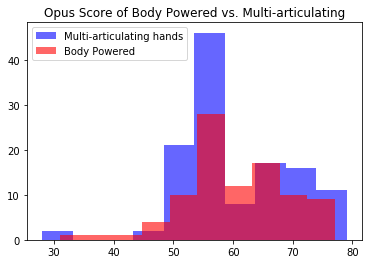

In [33]:
plt.hist(sht.opusMA.dropna(), alpha=0.6, color='b', label = "Multi-articulating hands")
plt.hist(sht.opusBPHook.dropna(), alpha=0.6, color='r', label = "Body Powered")
plt.title("Opus Score of Body Powered vs. Multi-articulating")
plt.legend()
plt.show()

### Weighted Opus

In [34]:
print("The average score on w.o. for the multi-articulating is {0}".format(sht.opusMAWeighted.dropna().mean()))
print("The average score on w.o. for the body powered is {0}".format(sht.opusElecSGWeighted.dropna().mean()))
print()
print(stats.ttest_ind(sht.opusMAWeighted.dropna(), sht.opusElecSGWeighted.dropna()))
print("Not significant")

The average score on w.o. for the multi-articulating is 91.42276422764228
The average score on w.o. for the body powered is 89.55121951219512

Ttest_indResult(statistic=1.0061208054112396, pvalue=0.31510365692764608)
Not significant


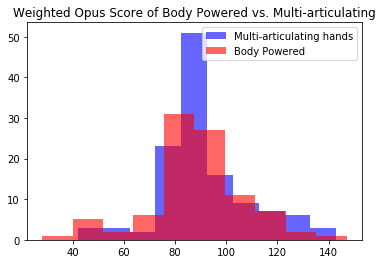

In [35]:
plt.hist(sht.opusMAWeighted.dropna(), alpha=0.6, color='b', label = "Multi-articulating hands")
plt.hist(sht.opusBPHookWeighted.dropna(), alpha=0.6, color='r', label = "Body Powered")
plt.title("Weighted Opus Score of Body Powered vs. Multi-articulating")
plt.legend()
plt.show()

# Check t-test analysis
The results from t-tests can sometimes be too positive, anova and Tukey's test accomadate for multiple comparisons.  So the below should be a validation of what was observed above.

## ANOVA
Use anova to make sure there is a difference in the means of at least one of the opus scores between the body powered, multi-articulating, single grip, and electric hooks

In [36]:
print("The body powered hooks are {0}".format(bodyPoweredHooks))
print()
print("The multi-articulating hands are {0}".format(electricHandMA))
print()
print("The single grip hands are {0}".format(electricHandSG))
print()
print("The electric hooks are {0}".format(electricHooks))

The body powered hooks are ['TRS Hook', 'Hosmer Hook', 'Body-powered Hand']

The multi-articulating hands are ['bebionic Hand', 'i-limb Hand', 'Michelangelo Hand']

The single grip hands are ['Motion Control (MC) Hand', 'Otto Bock Hand']

The electric hooks are ['Motion Control (MC) ETD', 'Otto Bock Axon Hook', 'Otto Bock Greifer']


Now we'll run anova to check that there is a difference among the mean scores on opus of these 4 groups.

In [37]:
stats.f_oneway(sht.opusBPHook.dropna(), sht.opusMA.dropna(), sht.opusElecSG.dropna(), sht.opusEHo.dropna())

F_onewayResult(statistic=0.090875861863848786, pvalue=0.96505230267936359)

We have don't have signficance at 0.05. But we do at 0.1. Let's look at Turkeys test, find out where.

In [38]:
opusDf = pd.concat([sht['PrimaryTerminalDevice'], sht['opusScore']], axis=1, keys=['deviceCategory','opusScore'])
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace([bodyPoweredHooks],"Body Powered")
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace([electricHandMA], "Multi-articulating")
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace([electricHandSG], "Single Grip")
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace([electricHooks], "Electric Hooks")
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace('Otto.*', "Electric Hooks", regex=True)
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace('Other.*', np.nan, regex=True)
opusDf["deviceCategory"] = opusDf["deviceCategory"].replace('Pass.*', np.nan, regex=True)
#groups = opusDf.groupby(opusDf['deviceCategory']).groups
#opusDf['deviceCategory'] = str(opusDf['deviceCategory'])
opusDf = opusDf.dropna()
df = opusDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)

group1,group2,meandiff,lower,upper,reject
Body Powered,Electric Hooks,0.7893,-3.3186,4.8973,False
Body Powered,Multi-articulating,-0.1859,-3.3837,3.0119,False
Body Powered,Single Grip,0.271,-2.6385,3.1804,False
Electric Hooks,Multi-articulating,-0.9753,-4.9065,2.956,False
Electric Hooks,Single Grip,-0.5184,-4.2189,3.1821,False
Multi-articulating,Single Grip,0.4569,-2.1972,3.1111,False


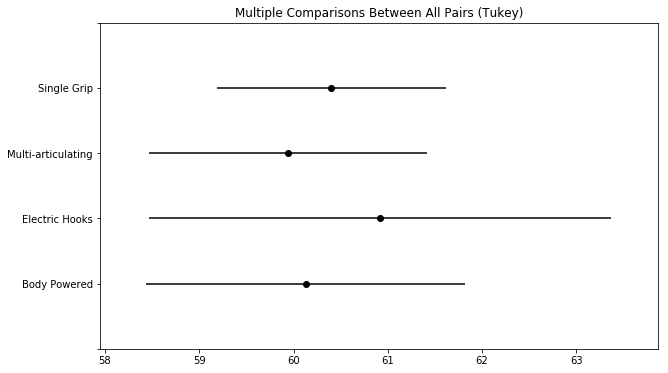

In [39]:
from ipykernel import kernelapp as app
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()           

At a significance level of 0.05 we have a difference between electric hooks and single grips. Which was observed with ttest.  Therefore we can conclude that there is a significant difference in the means between the single grips and the hooks.  However we do not have significance between hooks and multi-articulating at 95% confidence interval as we saw in the ttest.

What if we broadened the significance level to 0.1

group1,group2,meandiff,lower,upper,reject
Body Powered,Electric Hooks,0.7893,-2.8714,4.45,False
Body Powered,Multi-articulating,-0.1859,-3.0356,2.6637,False
Body Powered,Single Grip,0.271,-2.3217,2.8636,False
Electric Hooks,Multi-articulating,-0.9753,-4.4785,2.528,False
Electric Hooks,Single Grip,-0.5184,-3.816,2.7792,False
Multi-articulating,Single Grip,0.4569,-1.9083,2.8221,False


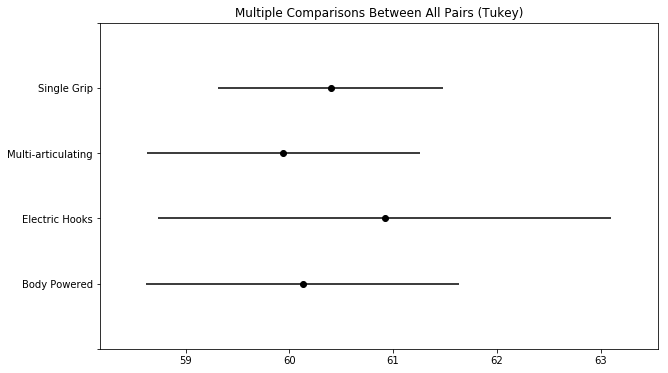

In [40]:
from ipykernel import kernelapp as app
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.1)
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()           

If we look at a 90% confidence interval, then we have significance between electric hooks vs single grip and electric hooks vs. multi-articulating.  With electric hooks underperforming on opus.

## Significance among brands
I'm curious if we'll get something  by looking at the specific brands

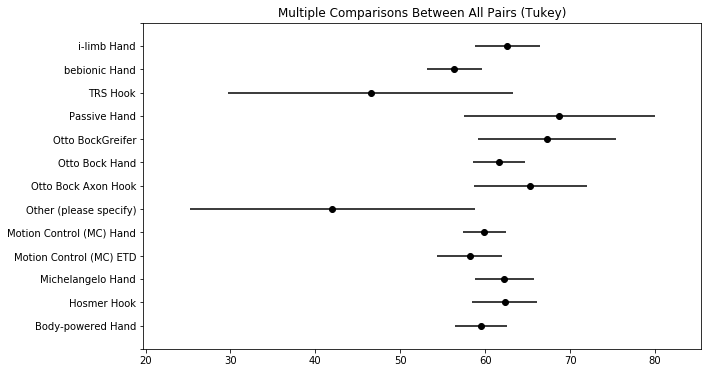

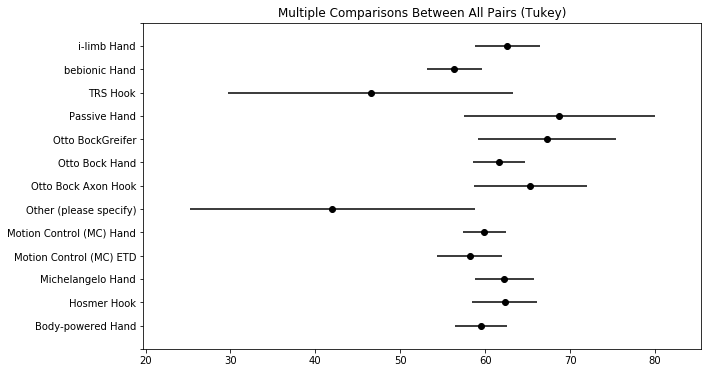

In [41]:
opusDf = pd.concat([sht['PrimaryTerminalDevice'], sht['opusScore']], axis=1, keys=['deviceCategory','opusScore'])
opusDf = opusDf.dropna()
df = opusDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
#tukey.summary() 

The TRS Hook and "other" are mucking up the scale, let's remove those

group1,group2,meandiff,lower,upper,reject
Body-powered Hand,Hosmer Hook,2.8237,-3.4635,9.1108,False
Body-powered Hand,Michelangelo Hand,2.7952,-2.9234,8.5139,False
Body-powered Hand,Motion Control (MC) ETD,-1.3104,-7.5325,4.9117,False
Body-powered Hand,Motion Control (MC) Hand,0.4443,-3.9146,4.8032,False
Body-powered Hand,Otto Bock Axon Hook,5.8333,-3.8755,15.5421,False
Body-powered Hand,Otto Bock Hand,2.1435,-3.068,7.355,False
Body-powered Hand,Otto BockGreifer,7.819,-3.5338,19.1719,False
Body-powered Hand,Passive Hand,9.2833,-5.395,23.9617,False
Body-powered Hand,bebionic Hand,-3.1267,-8.5695,2.3162,False
Body-powered Hand,i-limb Hand,3.1462,-3.141,9.4334,False


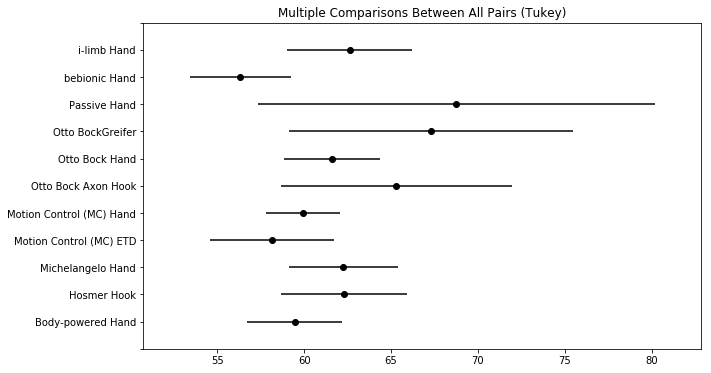

In [42]:
opusDf = pd.concat([sht['PrimaryTerminalDevice'], sht['opusScore']], axis=1, keys=['primaryTD','opusScore'])
opusDf["primaryTD"] = opusDf["primaryTD"].replace('Other.*', np.nan, regex=True)
opusDf["primaryTD"] = opusDf["primaryTD"].replace('TRS.*', np.nan, regex=True)
opusDf = opusDf.dropna()
df = opusDf.as_matrix()
dC = df[:,0].astype(str)
oS = df[:,1].astype(float)
tukey = pairwise_tukeyhsd(endog = oS,
                         groups = dC,
                         alpha = 0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary() 

In [43]:
groupbyPrimaryD = sht["opusScore"].groupby(sht["PrimaryTerminalDevice"])
groupbyPrimaryD.mean()

PrimaryTerminalDevice
Body-powered Hand           59.466667
Hosmer Hook                 62.290323
Michelangelo Hand           62.261905
Motion Control (MC) ETD     58.156250
Motion Control (MC) Hand    59.910959
Other (please specify)      42.000000
Otto Bock Axon Hook         65.300000
Otto Bock Hand              61.610169
Otto BockGreifer            67.285714
Passive Hand                68.750000
TRS Hook                    46.500000
bebionic Hand               56.340000
i-limb Hand                 62.612903
Name: opusScore, dtype: float64